## Part 1. building key variables

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

import geopandas                            
from shapely.geometry import Point

### reading raw data

In [12]:
data = pd.read_excel('owid-covid-data.xlsx', parse_dates = ['date'])
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [13]:
data.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,1.283080e+05,128303.000000,127263.000000,1.170790e+05,117275.000000,127263.000000,127650.000000,127645.000000,126610.000000,116434.000000,...,91378.000000,90058.000000,59043.000000,106593.000000,126243.000000,117422.000000,4784.000000,4784.000000,4784.000000,4784.000000
mean,2.113950e+06,8446.509146,8453.564500,5.180707e+04,183.310271,168.181052,20570.724031,88.936849,88.700646,415.336849,...,10.590102,32.751355,50.851794,3.028813,73.261706,0.726133,32730.488608,8.844423,16.068150,806.187966
std,1.203137e+07,43964.979530,43373.029386,2.655576e+05,867.935164,814.707069,34006.250391,206.698146,175.035520,677.428534,...,10.502537,13.514886,31.819330,2.454808,7.530630,0.150031,91411.877482,16.011001,30.976982,1185.801394
min,1.000000e+00,-74347.000000,-6223.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-3125.829000,-272.971000,0.000000,...,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-31959.400000,-27.350000,-95.920000,-1728.844404
25%,2.501000e+03,3.000000,10.429000,8.300000e+01,0.000000,0.143000,432.420250,0.328000,1.651000,12.602000,...,1.900000,21.600000,20.859000,1.300000,67.920000,0.602000,-153.050000,-0.900000,-0.622500,-39.561719
50%,2.880200e+04,105.000000,131.143000,7.750000e+02,2.000000,2.000000,3350.430000,11.365000,16.037500,84.459000,...,6.300000,31.400000,49.839000,2.400000,74.620000,0.744000,2585.550000,5.355000,6.755000,376.565768
75%,2.744565e+05,1091.500000,1146.928500,6.709500e+03,22.000000,18.714000,26188.225250,84.646000,94.341000,552.886750,...,19.300000,41.300000,83.241000,4.000000,78.740000,0.845000,21501.875000,13.810000,22.505000,1386.387282
max,2.600537e+08,908290.000000,827219.714000,5.181949e+06,18007.000000,14703.286000,248393.841000,8620.690000,3385.473000,6024.896000,...,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000,870830.300000,106.830000,373.740000,6180.171325


In [14]:
data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

### building 17 factors

In [15]:
data['cases/population'] = data['total_cases']/data['population']
data['case in 7 days'] = data['new_cases_smoothed']
data['policy response'] = data['stringency_index']
data['reproduction'] = data['reproduction_rate']
data['test/population'] = data['total_tests']/data['population']
data['positive rate'] = data['positive_rate']
data['vaccinations'] = data['people_fully_vaccinated_per_hundred']
data['death_cases'] = data['total_deaths']/data['total_cases']
data['death in 7 days'] = data['new_deaths_smoothed']
data['icu/cases'] = data['icu_patients']/data['total_cases']
data['icu/hospital'] = data['icu_patients']/data['hosp_patients']
data['hospital/cases'] = data['hosp_patients']/data['total_cases']
data['gdp per capita'] = data['gdp_per_capita']
data['population density'] = data['population_density']
data['extreme poverty/population'] = data['extreme_poverty']/data['population']
data['share of handwashing_facilities'] = data['handwashing_facilities']
data['hospital beds'] = data['hospital_beds_per_thousand']

In [16]:
key_variable = ['cases/population', 'case in 7 days', 'policy response', 'reproduction', 'test/population', 'positive rate', 'vaccinations', 'death_cases', 'death in 7 days', 'icu/cases', 'icu/hospital', 'hospital/cases', 'gdp per capita', 'population density', 'extreme poverty/population', 'share of handwashing_facilities', 'hospital beds']

In [17]:
len(key_variable)

17

### create new DataFrame only including 17 factors

In [18]:
key_data = data[['location', 'date'] + key_variable]
key_data.head()

,location,date,cases/population,case in 7 days,policy response,reproduction,test/population,positive rate,vaccinations,death_cases,death in 7 days,icu/cases,icu/hospital,hospital/cases,gdp per capita,population density,extreme poverty/population,share of handwashing_facilities,hospital beds
0,Afghanistan,2020-02-24,1.255164e-07,NaN,8.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1803.987,54.422,NaN,37.746,0.5
1,Afghanistan,2020-02-25,1.255164e-07,NaN,8.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1803.987,54.422,NaN,37.746,0.5
2,Afghanistan,2020-02-26,1.255164e-07,NaN,8.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1803.987,54.422,NaN,37.746,0.5
3,Afghanistan,2020-02-27,1.255164e-07,NaN,8.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1803.987,54.422,NaN,37.746,0.5
4,Afghanistan,2020-02-28,1.255164e-07,NaN,8.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1803.987,54.422,NaN,37.746,0.5


In [19]:
key_data.shape

(135794, 19)

In [20]:
key_data.dtypes

location                                   object
date                               datetime64[ns]
cases/population                          float64
case in 7 days                            float64
policy response                           float64
reproduction                              float64
test/population                           float64
positive rate                             float64
vaccinations                              float64
death_cases                               float64
death in 7 days                           float64
icu/cases                                 float64
icu/hospital                              float64
hospital/cases                            float64
gdp per capita                            float64
population density                        float64
extreme poverty/population                float64
share of handwashing_facilities           float64
hospital beds                             float64
dtype: object

## Part 2. Got the monthly data 

In [21]:
key_data.set_index('date', inplace = True)

In [25]:
key_data

,location,cases/population,case in 7 days,policy response,reproduction,test/population,positive rate,vaccinations,death_cases,death in 7 days,icu/cases,icu/hospital,hospital/cases,gdp per capita,population density,extreme poverty/population,share of handwashing_facilities,hospital beds
date,,,,,,,,,,,,,,,,,,
2020-02-24,Afghanistan,1.255164e-07,NaN,8.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1803.987,54.422,NaN,37.746,0.5
2020-02-25,Afghanistan,1.255164e-07,NaN,8.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1803.987,54.422,NaN,37.746,0.5
2020-02-26,Afghanistan,1.255164e-07,NaN,8.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1803.987,54.422,NaN,37.746,0.5
2020-02-27,Afghanistan,1.255164e-07,NaN,8.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1803.987,54.422,NaN,37.746,0.5
2020-02-28,Afghanistan,1.255164e-07,NaN,8.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1803.987,54.422,NaN,37.746,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-21,Zimbabwe,8.855386e-03,31.286,44.44,0.94,0.094802,0.012,18.21,0.035160,0.429,NaN,NaN,NaN,1899.775,42.729,0.000001,36.791,1.7
2021-11-22,Zimbabwe,8.857175e-03,33.714,NaN,0.94,NaN,NaN,18.24,0.035153,0.286,NaN,NaN,NaN,1899.775,42.729,0.000001,36.791,1.7
2021-11-23,Zimbabwe,8.857175e-03,24.143,NaN,NaN,NaN,NaN,18.27,0.035153,0.143,NaN,NaN,NaN,1899.775,42.729,0.000001,36.791,1.7


In [33]:
key_data.loc['2020-02']

,location,cases/population,case in 7 days,policy response,reproduction,test/population,positive rate,vaccinations,death_cases,death in 7 days,icu/cases,icu/hospital,hospital/cases,gdp per capita,population density,extreme poverty/population,share of handwashing_facilities,hospital beds
date,,,,,,,,,,,,,,,,,,
2020-02-24,Afghanistan,1.255164e-07,NaN,8.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1803.987,54.422,NaN,37.746,0.500
2020-02-25,Afghanistan,1.255164e-07,NaN,8.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1803.987,54.422,NaN,37.746,0.500
2020-02-26,Afghanistan,1.255164e-07,NaN,8.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1803.987,54.422,NaN,37.746,0.500
2020-02-27,Afghanistan,1.255164e-07,NaN,8.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1803.987,54.422,NaN,37.746,0.500
2020-02-28,Afghanistan,1.255164e-07,NaN,8.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1803.987,54.422,NaN,37.746,0.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-25,World,1.021008e-05,750.286,NaN,0.69,NaN,NaN,NaN,0.033705,100.286,NaN,NaN,NaN,15469.207,58.045,1.269847e-09,60.130,2.705
2020-02-26,World,1.033414e-05,818.429,NaN,0.79,NaN,NaN,NaN,0.034050,92.571,NaN,NaN,NaN,15469.207,58.045,1.269847e-09,60.130,2.705
2020-02-27,World,1.050671e-05,932.571,NaN,0.86,NaN,NaN,NaN,0.034010,80.857,NaN,NaN,NaN,15469.207,58.045,1.269847e-09,60.130,2.705


### choose a month (daily data)

In [22]:
def plotmap(month):
    
    ## 1. Get the monthly data
    Month = key_data.loc[month] 
    # divide 17 factors into 2 groups
    # 1.1. choose the maximum value to represent a month
    Month1 =  Month[['cases/population', 'policy response', 'test/population', 'positive rate', 'vaccinations', 
                 'death_cases', 'icu/cases', 'icu/hospital', 'hospital/cases', 'gdp per capita', 'population density', 
                 'extreme poverty/population', 'share of handwashing_facilities', 'hospital beds', 'location']] .groupby('location').max()
    Month1.reset_index(inplace = True)
    # 1.2. choose the mean value to represent a month
    Month2 =  Month[['case in 7 days', 'reproduction',  'death in 7 days', 'location']] .groupby('location').mean()
    Month2.reset_index(inplace = True)
    # merger the two groups
    Mon = pd.merge(left = Month1, right = Month2, on = 'location', how = 'outer')

    ## 2. Get the score
    # 2.1 creating tw ways to score
    def score1(i): # 值越小，风险越小，分数越高
        Mon[i + ' bin'] = pd.cut(Mon[i], bins = 10)
        Mon[i + ' score'] = pd.Series()
        for j in Mon.index:
            for h in range(0, 10):
                if Mon.loc[j, i+' bin'] == pd.value_counts(Mon[i + ' bin']).sort_index().index[h]:
                    Mon.loc[j, i+' score'] = 10 - h
    def score2(i): # 值越小，风险越高，分数越低
        Mon[i + ' bin'] = pd.cut(Mon[i], bins = 10)
        Mon[i + ' score'] = pd.Series()
        for j in Mon.index:
            for h in range(0, 10):
                if Mon.loc[j, i+' bin'] == pd.value_counts(Mon[i + ' bin']).sort_index().index[h]:
                    Mon.loc[j, i+' score'] = h+1
    # 2.2 scoring 17 factors
    key_varibles_1 =  ['cases/population','positive rate','death_cases','icu/cases','icu/hospital','hospital/cases','population density',
                       'extreme poverty/population','case in 7 days','reproduction','death in 7 days']
    key_varibles_2 = ['policy response','test/population','vaccinations','gdp per capita',
                      'share of handwashing_facilities','hospital beds']
    for i in key_varibles_1:
        score1(i)
        
    for i in key_varibles_2:
        score2(i)
    
    # 2.3 get the score dataframe
    score_variable = [i + ' score' for i in key_variable]
    Mon_score = Mon[['location'] + score_variable]
    # 2.4 dealing with missing value
    # 2.4.1 divide 14 factors into three groups, before/after/others
    before_variable = ['cases/population score', 'case in 7 days score', 'policy response score', 'reproduction score', 
                   'test/population score', 'positive rate score', 'vaccinations score']
    after_variable = ['death_cases score', 'death in 7 days score']
    others_variable = ['gdp per capita score', 'extreme poverty/population score', 'population density score', 
                   'share of handwashing_facilities score', 'hospital beds score']
    # 2.4.2 dealing with missing values in [before factors]
    Mon_before = Mon_score[['location'] + before_variable]
    Mon_before.set_index('location', inplace = True)
    for i in Mon_before.index:
        if Mon_before.loc[i].isnull().any():
            Mon_before.loc[i].fillna(value = Mon_before.loc[i].mean(), inplace = True)
    Mon_before.dropna(axis = 0, inplace = True)  
    # 2.4.3. dealing with missing values in [after factors]
    Mon_after = Mon_score[['location'] + after_variable]
    Mon_after.set_index('location', inplace = True)
    for i in Mon_after.index:
        if Mon_after.loc[i].isnull().any():
            Mon_after.loc[i].fillna(value = Mon_after.loc[i].mean(), inplace = True)
    Mon_after.dropna(axis = 0, inplace = True)
    # 2.4.4. dealing with missing values in [others facors]
    Mon_others = Mon_score[['location'] + others_variable]
    Mon_others.set_index('location', inplace = True)
    for i in Mon_others.index:
        if Mon_others.loc[i].isnull().any():
            Mon_others.loc[i].fillna(value = Mon_others.loc[i].mean(), inplace = True)
    Mon_others.dropna(axis = 0, inplace = True)
    # 2.4.5 recombine the [before + after + others] variables to get the score dataframe¶
    Mon_before.reset_index(inplace = True)
    Mon_after.reset_index(inplace = True)
    Mon_others.reset_index(inplace = True)
    Mon_ba = pd.merge(left = Mon_before, right = Mon_after, on = 'location', how = 'inner')
    Mon_score = pd.merge(left = Mon_ba, right = Mon_others, on = 'location', how = 'inner')
    
    ## 3. Plot the map
    world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
    world['name'] = world['name'].str.strip()
    
    def map_plot(before, after, others):
        # input the weights for before/after/others variable, then get the map!
        Mon_score['total score'] = (Mon_score[before_variable].sum(axis = 1))*before + (Mon_score[after_variable].sum(axis = 1))*after + (Mon_score[others_variable].sum(axis = 1))*others # total score is high = risk level is low
        Mon_score['location'] = Mon_score['location'].str.strip()
        Mon_score_world = pd.merge(left = Mon_score, right = world, left_on = ['location'], right_on = ['name'], how = 'inner', indicator = True)
        Mon_score_world = geopandas.GeoDataFrame(Mon_score_world, geometry = 'geometry')
        from mpl_toolkits.axes_grid1 import make_axes_locatable
        fig,gax = plt.subplots(figsize = (20, 20))
        divider = make_axes_locatable(gax)

        legend_ax = divider.append_axes('right', size = '5%', pad = 0.1)

        Mon_score_world.plot(ax = gax, column = 'total score',
                             edgecolor = 'black', cmap = 'Greens',
                             legend = True, cax = legend_ax)

        gax.axis('off')
        gax.annotate('higher score, lower risk', xy = (0.64, 0.17), xycoords = 'figure fraction', fontsize = 18)

        plt.show()
        
    map_plot(0.4, 0.4, 0.2)

C:\Users\Ning\AppData\Local\Temp/ipykernel_6964/3010963847.py:21: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  Mon[i + ' score'] = pd.Series()
C:\Users\Ning\AppData\Local\Temp/ipykernel_6964/3010963847.py:28: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  Mon[i + ' score'] = pd.Series()
C:\Users\Ning\anaconda3\envs\geo_env\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


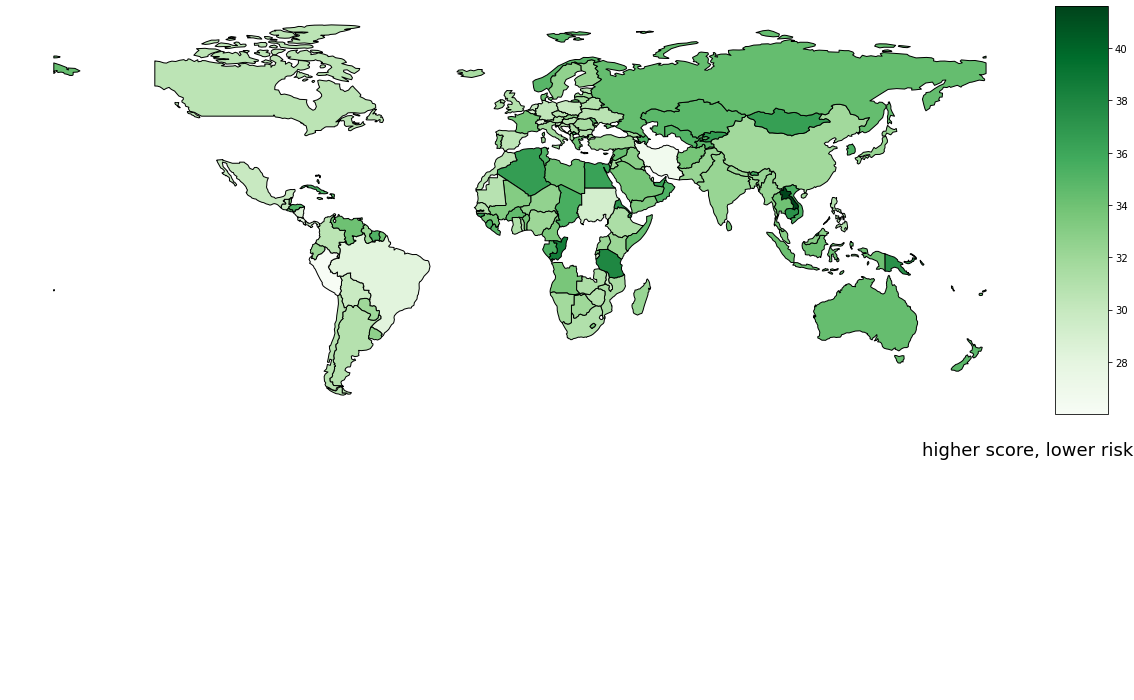

In [39]:
plotmap('2020')